# Statistics and figures

This notebok contains all the statistics and figures (save for Figure 1) in the manuscript.

Required packages : `rgl`, `beanplot`

In [1]:
%load_ext rpy2.ipython

In [2]:
# run this cell if you have a High-DPI monitor
%load_ext retina

In [3]:
%%R
#load files with sequencing depth
depth<-read.table('64253_vs_64571_depth.tsv',header=T)
depth2<-read.table('checkmate_vs_80344_depth.tsv',header=T)
depth3<-read.table('78357_vs_78584_depth.tsv',header=T)

#identify blocks sequenced above 80% in all three pairs
kept<-depth[,5]>8000&depth2[,5]>8000&depth3[,5]>8000&depth[,7]>8000&depth2[,7]>8000&depth3[,7]>8000

#now load df and dxy values per block, including only blocks above 80%
victoria<-read.table('victoria_df_dxy.tsv',header=T)
victoria=victoria[kept==T,]
victoria=victoria[order(victoria[,1]),]
kivu<-read.table('kivu_df_dxy.tsv',header=T)
kivu=kivu[kept==T,]
kivu=kivu[order(kivu[,1]),]
mweru<-read.table('mweru_df_dxy.tsv',header=T)
mweru=mweru[kept==T,]
mweru=mweru[order(mweru[,1]),]

In [4]:
%%R
#compare genome-wide fixed divergence between Victoria, Kivu, and Mweru
print( "Victoria vs Kivu" )
print( kruskal.test(victoria[,4],kivu[,4]) )
print( "Mweru vs Kivu" )
print( kruskal.test(mweru[,4],kivu[,4]) )
print( "Victoria vs Mweru" )
print( kruskal.test(victoria[,4],mweru[,4]) )

[1] "Victoria vs Kivu"

	Kruskal-Wallis rank sum test

data:  victoria[, 4] and kivu[, 4]
Kruskal-Wallis chi-squared = 219.66, df = 20, p-value < 2.2e-16

[1] "Mweru vs Kivu"

	Kruskal-Wallis rank sum test

data:  mweru[, 4] and kivu[, 4]
Kruskal-Wallis chi-squared = 356.48, df = 20, p-value < 2.2e-16

[1] "Victoria vs Mweru"

	Kruskal-Wallis rank sum test

data:  victoria[, 4] and mweru[, 4]
Kruskal-Wallis chi-squared = 581.38, df = 104, p-value < 2.2e-16



In [5]:
%%R
#calculate means
print( "Victoria mean, std" )
print( c( mean(victoria[,4]), sd(victoria[,4]) ) )
print( "Kivu mean, std" )
print( c( mean(kivu[,4]), sd(kivu[,4]) ) )
print( "Mweru mean, std" )
print( c( mean(mweru[,4]), sd(mweru[,4]) ) )

#calculate standard deviations


[1] "Victoria mean, std"
[1] 1.092892 1.496853
[1] "Kivu mean, std"
[1] 1.135792 1.535738
[1] "Mweru mean, std"
[1] 49.37924 13.02377


In [6]:
%%R
#set mean+2SD threshold
victoria.threshold<-mean(victoria[,4])+2*sd(victoria[,4])
kivu.threshold<-mean(kivu[,4])+2*sd(kivu[,4])
mweru.threshold<-mean(mweru[,4])+2*sd(mweru[,4])

In [7]:
%%R
#calculate how many blocks fall above this threshold
print( table(victoria[,4]>victoria.threshold) )
print( table(kivu[,4]>kivu.threshold) )
print( table(mweru[,4]>mweru.threshold) )


FALSE  TRUE 
37798  1409 

FALSE  TRUE 
37734  1473 

FALSE  TRUE 
38309   898 


In [8]:
%%R
#df outliers

#top 1%
victoria.out.q1<-victoria[,4]>quantile(victoria[,4],probs=0.99)
kivu.out.q1<-kivu[,4]>quantile(kivu[,4],probs=0.99)
mweru.out.q1<-mweru[,4]>quantile(mweru[,4],probs=0.99)

#top 0.1%
victoria.out.q01<-victoria[,4]>quantile(victoria[,4],probs=0.999)
kivu.out.q01<-kivu[,4]>quantile(kivu[,4],probs=0.999)
mweru.out.q01<-mweru[,4]>quantile(mweru[,4],probs=0.999)

#top 0.01%
victoria.out.q001<-victoria[,4]>quantile(victoria[,4],probs=0.9999)
kivu.out.q001<-kivu[,4]>quantile(kivu[,4],probs=0.9999)
mweru.out.q001<-mweru[,4]>quantile(mweru[,4],probs=0.9999)

In [9]:
%%R
# compare outliers in two young pairs to Mweru
print( wilcox.test(victoria[victoria.out.q1,4],mweru[,4]) )
print( wilcox.test(victoria[victoria.out.q01,4],mweru[,4]) )
print( wilcox.test(victoria[victoria.out.q001,4],mweru[,4]) )

print( wilcox.test(kivu[kivu.out.q1,4],mweru[,4]) )
print( wilcox.test(kivu[kivu.out.q01,4],mweru[,4]) )
print( wilcox.test(kivu[kivu.out.q001,4],mweru[,4]) )


	Wilcoxon rank sum test with continuity correction

data:  victoria[victoria.out.q1, 4] and mweru[, 4]
W = 18686, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


	Wilcoxon rank sum test with continuity correction

data:  victoria[victoria.out.q01, 4] and mweru[, 4]
W = 4627, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


	Wilcoxon rank sum test with continuity correction

data:  victoria[victoria.out.q001, 4] and mweru[, 4]
W = 766.5, p-value = 0.003061
alternative hypothesis: true location shift is not equal to 0


	Wilcoxon rank sum test with continuity correction

data:  kivu[kivu.out.q1, 4] and mweru[, 4]
W = 23901, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


	Wilcoxon rank sum test with continuity correction

data:  kivu[kivu.out.q01, 4] and mweru[, 4]
W = 8227.5, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


	Wilcoxon rank sum test with c

In [10]:
%%R
#compare dxy values of df outlier regions, Mweru
print( "--- q1 ---" )
print( mean(mweru[mweru.out.q1==T,5]) )
print( mean(mweru[mweru.out.q1==F,5]) )
print( table(mweru.out.q1) )
print( kruskal.test((mweru[,5])~mweru.out.q1)$p.value )

print( "--- q01 ---" )
print( mean(mweru[mweru.out.q01==T,5]) )
print( mean(mweru[mweru.out.q01==F,5]) )
print( table(mweru.out.q01) )
print( kruskal.test((mweru[,5])~mweru.out.q01)$p.value )

print( "--- q001 ---" )
print( mean(mweru[mweru.out.q001==T,5]) )
print( mean(mweru[mweru.out.q001==F,5]) )
print( table(mweru.out.q001) )
print( kruskal.test((mweru[,5])~mweru.out.q001)$p.value )

[1] "--- q1 ---"
[1] 88.44986
[1] 52.20745
mweru.out.q1
FALSE  TRUE 
38838   369 
[1] 1.040347e-239
[1] "--- q01 ---"
[1] 99.04167
[1] 52.50582
mweru.out.q01
FALSE  TRUE 
39171    36 
[1] 2.842644e-25
[1] "--- q001 ---"
[1] 111.5
[1] 52.54254
mweru.out.q001
FALSE  TRUE 
39203     4 
[1] 0.0005320028


In [11]:
%%R
#compare dxy values of df outlier regions, Kivu
print( "--- q1 ---" )
print( mean(kivu[kivu.out.q1==T,5]) )
print( mean(kivu[kivu.out.q1==F,5]) )
print( table(kivu.out.q1) )
print( kruskal.test((kivu[,5])~kivu.out.q1)$p.value )

print( "--- q01 ---" )
print( mean(kivu[kivu.out.q01==T,5]) )
print( mean(kivu[kivu.out.q01==F,5]) )
print( table(kivu.out.q01) )
print( kruskal.test((kivu[,5])~kivu.out.q01)$p.value )

print( "--- q001 ---" )
print( mean(kivu[kivu.out.q001==T,5]) )
print( mean(kivu[kivu.out.q001==F,5]) )
print( table(kivu.out.q001) )
print( kruskal.test((kivu[,5])~kivu.out.q001)$p.value )

[1] "--- q1 ---"
[1] 11.3494
[1] 3.210855
kivu.out.q1
FALSE  TRUE 
38958   249 
[1] 3.46327e-161
[1] "--- q01 ---"
[1] 15.97436
[1] 3.249885
kivu.out.q01
FALSE  TRUE 
39168    39 
[1] 2.285252e-27
[1] "--- q001 ---"
[1] 24
[1] 3.260956
kivu.out.q001
FALSE  TRUE 
39204     3 
[1] 0.002616479


In [12]:
%%R
#compare dxy values of df outlier regions, Victoria
print( "--- q1 ---" )
print( mean(victoria[victoria.out.q1==T,5]) )
print( mean(victoria[victoria.out.q1==F,5]) )
print( table(victoria.out.q1) )
print( kruskal.test((victoria[,5])~victoria.out.q1)$p.value )

print( "--- q01 ---" )
print( mean(victoria[victoria.out.q01==T,5]) )
print( mean(victoria[victoria.out.q01==F,5]) )
print( table(victoria.out.q01) )
print( kruskal.test((victoria[,5])~victoria.out.q01)$p.value )

print( "--- q001 ---" )
print( mean(victoria[victoria.out.q001==T,5]) )
print( mean(victoria[victoria.out.q001==F,5]) )
print( table(victoria.out.q001) )
print( kruskal.test((victoria[,5])~victoria.out.q001)$p.value )

[1] "--- q1 ---"
[1] 10.66739
[1] 2.961452
victoria.out.q1
FALSE  TRUE 
38977   230 
[1] 8.751897e-150
[1] "--- q01 ---"
[1] 13.5
[1] 2.997013
victoria.out.q01
FALSE  TRUE 
39171    36 
[1] 2.294555e-25
[1] "--- q001 ---"
[1] 18.5
[1] 3.005471
victoria.out.q001
FALSE  TRUE 
39204     3 
[1] 0.002616555


### test for elevated $d_{xy}$ in $d_f$ outlier regions from another pair

In [13]:
%%R

#vic outliers in kivu
print( "--- q1 ---" )
print( mean(kivu[victoria.out.q1==T,5]) )
print( mean(kivu[victoria.out.q1==F,5]) )
print( kruskal.test((kivu[,5])~victoria.out.q1)$p.value )

print( "--- q01 ---" )
print( mean(kivu[victoria.out.q01==T,5]) )
print( mean(kivu[victoria.out.q01==F,5]) )
print( kruskal.test((kivu[,5])~victoria.out.q01)$p.value )

print( "--- q001 ---" )
print( mean(kivu[victoria.out.q001==T,5]) )
print( mean( kivu[victoria.out.q001==F,5]) )
print( kruskal.test((kivu[,5])~victoria.out.q001)$p.value )

[1] "--- q1 ---"
[1] 4.119565
[1] 3.257485
[1] 2.754401e-09
[1] "--- q01 ---"
[1] 4.625
[1] 3.26129
[1] 9.740983e-05
[1] "--- q001 ---"
[1] 4
[1] 3.262486
[1] 0.5400406


In [14]:
%%R
#vic outliers in mweru
print( "--- q1 ---" )
print( mean(mweru[victoria.out.q1==T,5]) )
print( mean(mweru[victoria.out.q1==F,5]) )
print( kruskal.test((mweru[,5])~victoria.out.q1)$p.value )

print( "--- q01 ---" )
print( mean(mweru[victoria.out.q01==T,5]) )
print( mean(mweru[victoria.out.q01==F,5]) )
print( kruskal.test((mweru[,5])~victoria.out.q01)$p.value )

print( "--- q001 ---" )
print( mean(mweru[victoria.out.q001==T,5]) )
print( mean(mweru[victoria.out.q001==F,5]) )
print( kruskal.test((mweru[,5])~victoria.out.q001)$p.value )

[1] "--- q1 ---"
[1] 58.7663
[1] 52.51186
[1] 1.61552e-12
[1] "--- q01 ---"
[1] 60.76389
[1] 52.541
[1] 0.0005688344
[1] "--- q001 ---"
[1] 61.33333
[1] 52.54788
[1] 0.6102441


In [15]:
%%R
#kivu outliers in victoria
print( "--- q1 ---" )
print( mean(victoria[kivu.out.q1==T,5]) )
print( mean(victoria[kivu.out.q1==F,5]) )
print( kruskal.test((victoria[,5])~kivu.out.q1)$p.value )

print( "--- q01 ---" )
print( mean(victoria[kivu.out.q01==T,5]) )
print( mean(victoria[kivu.out.q01==F,5]) )
print( kruskal.test((victoria[,5])~kivu.out.q01)$p.value )

print( "--- q001 ---" )
print( mean(victoria[kivu.out.q001==T,5]) )
print( mean(victoria[kivu.out.q001==F,5]) )
print( kruskal.test((victoria[,5])~kivu.out.q001)$p.value )

[1] "--- q1 ---"
[1] 3.313253
[1] 3.004697
[1] 0.005766019
[1] "--- q01 ---"
[1] 3.423077
[1] 3.006242
[1] 0.1582576
[1] "--- q001 ---"
[1] 4.166667
[1] 3.006568
[1] 0.2179059


In [16]:
%%R
#kivu outliers in mweru
print( "--- q1 ---" )
print( mean(mweru[kivu.out.q1==T,5]) )
print( mean(mweru[kivu.out.q1==F,5]) )
print( kruskal.test((mweru[,5])~kivu.out.q1)$p.value )

print( "--- q01 ---" )
print( mean(mweru[kivu.out.q01==T,5]) )
print( mean(mweru[kivu.out.q01==F,5]) )
print( kruskal.test((mweru[,5])~kivu.out.q01)$p.value )

print( "--- q001 ---" )
print( mean(mweru[kivu.out.q001==T,5]) )
print( mean(mweru[kivu.out.q001==F,5]) )
print( kruskal.test((mweru[,5])~kivu.out.q001)$p.value )

[1] "--- q1 ---"
[1] 56.94578
[1] 52.52045
[1] 1.852051e-06
[1] "--- q01 ---"
[1] 62.62821
[1] 52.53851
[1] 7.6108e-05
[1] "--- q001 ---"
[1] 50.5
[1] 52.54871
[1] 0.7644699


In [17]:
%%R
#mweru outliers in victoria
print( "--- q1 ---" )
print( mean(victoria[mweru.out.q1==T,5]) )
print( mean(victoria[mweru.out.q1==F,5]) )
print( kruskal.test((victoria[,5])~mweru.out.q1)$p.value )

print( "--- q01 ---" )
print( mean(victoria[mweru.out.q01==T,5]) )
print( mean(victoria[mweru.out.q01==F,5]) )
print( kruskal.test((victoria[,5])~mweru.out.q01)$p.value )

print( "--- q001 ---" )
print( mean(victoria[mweru.out.q001==T,5]) )
print( mean(victoria[mweru.out.q001==F,5]) )
print( kruskal.test((victoria[,5])~mweru.out.q001)$p.value )

[1] "--- q1 ---"
[1] 3.909214
[1] 2.998082
[1] 3.57716e-18
[1] "--- q01 ---"
[1] 3.75
[1] 3.005974
[1] 0.04031148
[1] "--- q001 ---"
[1] 2.375
[1] 3.006721
[1] 0.6219069


In [18]:
%%R
#mweru outliers in kivu
print( "--- q1 ---" )
print( mean(kivu[mweru.out.q1==T,5]) )
print( mean(kivu[mweru.out.q1==F,5]) )
print( kruskal.test((kivu[,5])~mweru.out.q1)$p.value )

print( "--- q01 ---" )
print( mean(kivu[mweru.out.q01==T,5]) )
print( mean(kivu[mweru.out.q01==F,5]) )
print( kruskal.test((kivu[,5])~mweru.out.q01)$p.value )

print( "--- q001 ---" )
print( mean(kivu[mweru.out.q001==T,5]) )
print( mean(kivu[mweru.out.q001==F,5]) )
print( kruskal.test((kivu[,5])~mweru.out.q001)$p.value )

[1] "--- q1 ---"
[1] 4.23916
[1] 3.253264
[1] 4.026493e-16
[1] "--- q01 ---"
[1] 4.256944
[1] 3.261629
[1] 0.002676548
[1] "--- q001 ---"
[1] 4
[1] 3.262467
[1] 0.7964774


### Figure 2A

In [19]:
%%R
#rgl plot prep, Figure 2A
require(rgl)
victoria.pi<-scale(victoria[,4],center=F,scale=max(mweru[,4]))
kivu.pi<-scale(kivu[,4],center=F,scale=max(mweru[,4]))
mweru.pi<-scale(mweru[,4],center=F,scale=max(mweru[,4]))


mwerucol=c("red","blue","red","blue","red","blue","red","blue",
"red","blue","red","blue","red",
"blue","red","blue","red","blue","red","blue")[mweru[,1]]
m.y <- seq(-2, 2, length=100)
m.x <-c(1:length(mweru[,4]))
m.f <- function(s,t) {
(mweru.pi[s]*(1-abs(t/2)))
}
m.z <- outer(m.x, m.y, m.f)


k.y <- seq(-2, 2, length=100)
k.x <-c(1:length(kivu[,4]))
k.f <- function(s,t) {
(kivu.pi[s]*(1-abs(t/2)))
}
k.z <- outer(k.x, k.y, k.f)

v.y <- seq(-2, 2, length=100)
v.x <-c(1:length(victoria[,4]))
v.f <- function(s,t) {
(victoria.pi[s]*(1-abs(t/2)))
}
v.z <- outer(v.x, v.y, v.f)

col.out.vic<- c("blue", "red")[as.integer(victoria.out.q1)+1]
col.out.kivu<- c("blue", "red")[as.integer(kivu.out.q1)+1]
col.out.mweru<- c("blue", "red")[as.integer(mweru.out.q1)+1]

plotpersp<-matrix(c( 0.71309084,  0.6988822, -0.05536157,  0,
                    -0.09950599,  0.1790637,  0.97879231,  0,
                     0.69397390, -0.6924592,  0.19723161,  0,
                     0.00000000,  0.0000000,  0.00000000,  1), 
                  nrow=4, ncol=4, byrow=T )

#Figure 2A
par3d( windowRect=c( 0,0,1000,1000 ), userMatrix=plotpersp )

persp3d(1:table(kept)[2],1:100,v.z,aspect=c(10,1,1),axes=F,col=mwerucol,xlab="",ylab="",zlab="")
persp3d(1:table(kept)[2],201:300,k.z,axes=F,col=mwerucol,add=T)
persp3d(1:table(kept)[2],401:500,m.z,axes=F,col=mwerucol,add=T)
snapshot3d( file='Figure_2A.png' )

#Exit rgl
rgl.close()
rgl.quit()

/usr/lib/python2.7/dist-packages/rpy2/robjects/functions.py:106: UserWarning: Loading required package: rgl

  res = super(Function, self).__call__(*new_args, **new_kwargs)


Populating the interactive namespace from numpy and matplotlib


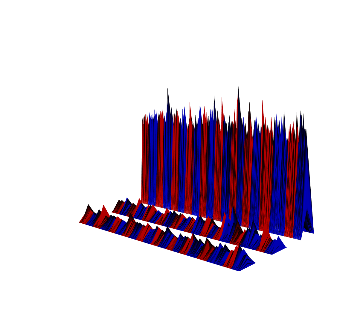

In [20]:
%pylab inline

from IPython.display import display, Image
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

figure(figsize=(5, 5))

plt.imshow(mpimg.imread('Figure_2A.png'))
plt.axis('off')
        
plt.tight_layout()

### Figure 2B

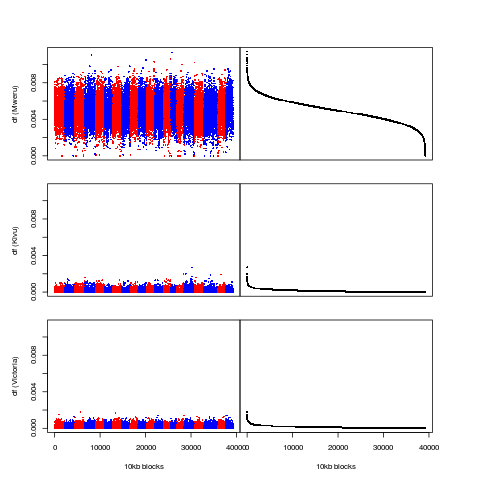

In [21]:
%%R
#Figure 2B
par(mfrow=c(3,2))
par(mar=c(0,5,5,0))
plot(mweru[,4]/10000,col=mwerucol,xaxt="n",cex=0.5,
ylab="df (Mweru)",pch=16,ylim=c(0,max(mweru[,5]/10000)))
par(mar=c(0,0,5,5))
plot(sort(mweru[,4]/10000,decreasing=T),pch=16,
yaxt="n",xaxt="n",xlab="",cex=0.5,ylim=c(0,max(mweru[,4]/10000)))
par(mar=c(2.5,5,2.5,0))
plot(kivu[,4]/10000,col=mwerucol,xaxt="n",ylab="df (Kivu)",cex=0.5,
pch=16,ylim=c(0,max(mweru[,5]/10000)))
par(mar=c(2.5,0,2.5,5))
plot(sort(kivu[,4]/10000,decreasing=T),pch=16,
yaxt="n",xaxt="n",xlab="",cex=0.5,ylim=c(0,max(mweru[,4]/10000)))
par(mar=c(5,5,0,0))
plot(victoria[,4]/10000,xlab="10kb blocks",col=mwerucol,cex=0.5,
ylab="df (Victoria)",pch=16,ylim=c(0,max(mweru[,5]/10000)))
par(mar=c(5,0,0,5))
plot(sort(victoria[,4]/10000,decreasing=T),pch=16,
yaxt="n",xlab="10kb blocks",cex=0.5,ylim=c(0,max(mweru[,4]/10000)))

### Figure 3

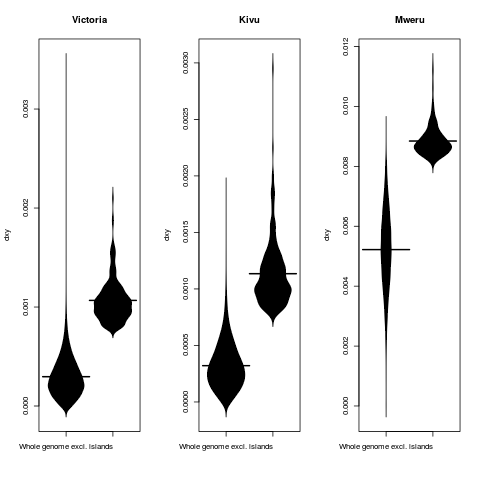

In [22]:
%%R
# Figure 3
library(beanplot)
par(mfrow=c(1,3))
beanplot((victoria[,5]/10000)~victoria.out.q1,what=c(0,1,1,0),bw="nrd0",
xaxt="n",ylab="dxy",main="Victoria")
axis(1,1:2,labels=c("Whole genome excl. islands","Islands"))

beanplot((kivu[,5]/10000)~kivu.out.q1,what=c(0,1,1,0),bw="nrd0",
xaxt="n",ylab="dxy",main="Kivu")
axis(1,1:2,labels=c("Whole genome excl. islands","Islands"))

beanplot((mweru[,5]/10000)~mweru.out.q1,what=c(0,1,1,0),bw="nrd0",
xaxt="n",ylab="dxy",main="Mweru")
axis(1,1:2,labels=c("Whole genome excl. islands","Islands"))

### Figure 4

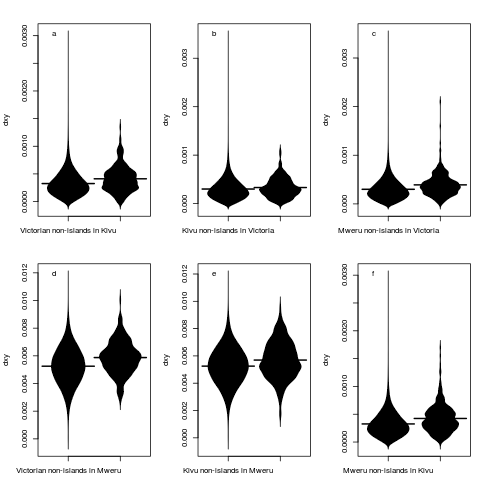

In [23]:
%%R
#Figure 4
par(mfrow=c(2,3))
par(mar=c(2.5,4,2.5,1))
beanplot((kivu[,5]/10000)~victoria.out.q1,what=c(0,1,1,0),bw="nrd0",
xaxt="n",ylab="dxy")
legend("topleft", "a", bty="n") 
axis(1,1:2,labels=c("Victorian non-islands in Kivu","Victorian islands in Kivu"))
beanplot((victoria[,5]/10000)~kivu.out.q1,what=c(0,1,1,0),bw="nrd0",
xaxt="n",ylab="dxy")
legend("topleft", "b", bty="n") 
axis(1,1:2,labels=c("Kivu non-islands in Victoria","Kivu islands in Victoria"))
beanplot((victoria[,5]/10000)~mweru.out.q1,what=c(0,1,1,0),bw="nrd0",
xaxt="n",ylab="dxy")
legend("topleft", "c", bty="n") 
axis(1,1:2,labels=c("Mweru non-islands in Victoria","Mweru islands in Victoria"))
beanplot((mweru[,5]/10000)~victoria.out.q1,what=c(0,1,1,0),bw="nrd0",
xaxt="n",ylab="dxy")
legend("topleft", "d", bty="n") 
axis(1,1:2,labels=c("Victorian non-islands in Mweru","Victorian islands in Mweru"))
beanplot((mweru[,5]/10000)~kivu.out.q1,what=c(0,1,1,0),bw="nrd0",
xaxt="n",ylab="dxy")
legend("topleft", "e", bty="n") 
axis(1,1:2,labels=c("Kivu non-islands in Mweru","Kivu islands in Mweru"))
beanplot((kivu[,5]/10000)~mweru.out.q1,what=c(0,1,1,0),bw="nrd0",
xaxt="n",ylab="dxy")
legend("topleft", "f", bty="n") 
axis(1,1:2,labels=c("Mweru non-islands in Kivu","Mweru islands in Kivu"))